In [1]:
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import DataLoader

from imports.imageDataset import ImageDataset
from imports.model_architectures import ResnetCNN
from imports.utils import plot_trainval_graphs, train

import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
#definindo classes
classes = ['dog','man','woman','child','water','ball','car','snow']
class2label = {classes[i]:i for i in range(len(classes))}
label2class = {i:classes[i] for i in range(len(classes))}

#carregando dataset
whole_train_data = torch.load('./data/processed/train_subset.pt', weights_only=False)
train_dataset, val_dataset= torch.utils.data.random_split(whole_train_data, [0.8, 0.2])

## Fazendo os loaders
batch_size = 32
num_workers = 4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False,
                          num_workers=num_workers, pin_memory=True)

/home/marcos/Documents/2025.1/neurais/code/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/marcos/Documents/2025.1/neurais/code/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30 - Train Loss: 1.5311, Train Acc: 0.4828
           Val Loss: 1.2711, Val Acc: 0.6125
Epoch 2/30 - Train Loss: 0.9238, Train Acc: 0.7500
           Val Loss: 1.0994, Val Acc: 0.6687
Epoch 3/30 - Train Loss: 0.7825, Train Acc: 0.7703
           Val Loss: 1.0712, Val Acc: 0.6625
Epoch 4/30 - Train Loss: 0.6450, Train Acc: 0.8281
           Val Loss: 1.0538, Val Acc: 0.6750
Epoch 5/30 - Train Loss: 0.6021, Train Acc: 0.8344
           Val Loss: 1.0711, Val Acc: 0.6562
Epoch 6/30 - Train Loss: 0.4628, Train Acc: 0.9000
           Val Loss: 1.0398, Val Acc: 0.6625
Epoch 7/30 - Train Loss: 0.4096, Train Acc: 0.9078
           Val Loss: 1.0755, Val Acc: 0.6750
Epoch 8/30 - Train Loss: 0.3315, Train Acc: 0.9531
           Val Loss: 1.0706, Val Acc: 0.6813
Epoch 9/30 - Train Loss: 0.3380, Train Acc: 0.9297
           Val Loss: 1.1102, Val Acc: 0.6562
Epoch 10/30 - Train Loss: 0.2775, Train Acc: 0.9531
           Val Loss: 1.1585, Val Acc: 0.6625
Epoch 11/30 - Train Loss: 0.2708, Train

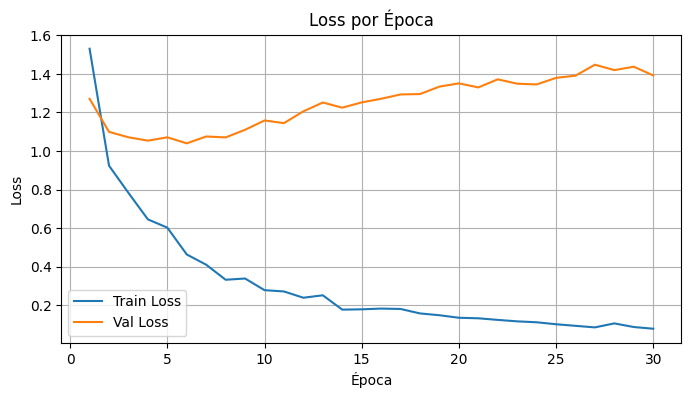

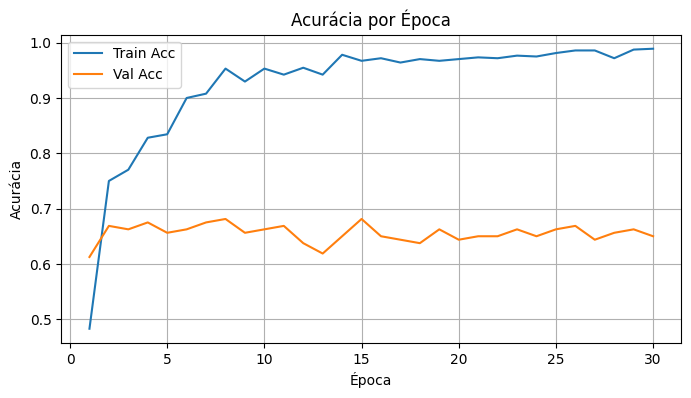

In [4]:
model_resnet = ResnetCNN(num_classes=len(classes)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet.parameters(), lr=1e-3)
num_epochs = 30

train_losses, train_accs, val_losses, val_accs = train(model_resnet,optimizer,criterion,train_loader,val_loader,num_epochs, device=device)
plot_trainval_graphs(train_losses, train_accs, val_losses, val_accs)

Parece que está dando overfitting, pq os dados de treinamento ele está conseguindo pegar quase todos, mas os de validação não.

In [ ]:
#torch.save(model_resnet, './models/resnet_based.pt')